# NGSIM Data Checks 

We want to check if the aggregated results from the reports match the more detailed vehicle records data

### Imports 

In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import pytz
import numpy as np

### Load data

In [24]:
data_folder = ('C:\\Users\\fvall\\Documents\\Research\\TrafficSimulation'
               '\\NGSIM_original\\US-101-LosAngeles-CA\\us-101-vehicle'
               '-trajectory-data')
data_file = 'trajectories-0750am-0805am.csv'
data_path = os.path.join(data_folder, data_file)

In [25]:
data = pd.read_csv(data_path)

In [26]:
data.head()

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_Length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Preceding,Following,Space_Hdwy,Time_Hdwy
0,2,13,437,1118846980200,16.467,35.381,6451137.641,1873344.962,14.5,4.9,2,40.0,0.0,2,0,0,0.0,0.0
1,2,14,437,1118846980300,16.447,39.381,6451140.329,1873342.000,14.5,4.9,2,40.0,0.0,2,0,0,0.0,0.0
2,2,15,437,1118846980400,16.426,43.381,6451143.018,1873339.038,14.5,4.9,2,40.0,0.0,2,0,0,0.0,0.0
3,2,16,437,1118846980500,16.405,47.380,6451145.706,1873336.077,14.5,4.9,2,40.0,0.0,2,0,0,0.0,0.0
4,2,17,437,1118846980600,16.385,51.381,6451148.395,1873333.115,14.5,4.9,2,40.0,0.0,2,0,0,0.0,0.0


## Total number of lane changes 

In [91]:
# Making sure data is sorted by vehicle id and time
data.sort_values(by=['Vehicle_ID', 'Frame_ID'], inplace=True)

In [61]:
vehicles = np.unique(data['Vehicle_ID'])
lanes = np.unique(data['Lane_ID'])

In [92]:
vehicles_by_starting_lane = np.zeros(len(lanes))
approx_lane_change_count = np.zeros(len(lanes))
lane_changes_by_starting_lane = np.zeros(len(lanes))
end_lane_by_starting_lane = np.zeros((len(lanes), len(lanes)))
for vehicle in vehicles:
    veh_lanes_over_time = data.loc[data['Vehicle_ID']==vehicle, 
                                   'Lane_ID']
    veh_lanes = np.unique(veh_lanes_over_time)
    starting_lane = veh_lanes_over_time.iloc[0]
    ending_lane = veh_lanes_over_time.iloc[-1]
    
    vehicles_by_starting_lane[starting_lane-1] += 1
    approx_lane_change_count[len(veh_lanes)-1] += 1
    lane_changes_by_starting_lane[starting_lane-1] += (
       len(veh_lanes)-1)
    end_lane_by_starting_lane[starting_lane-1, ending_lane-1] += 1

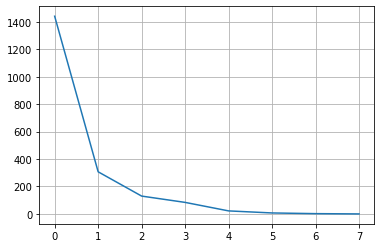

In [63]:
plt.plot([i for i in range(len(lanes))], approx_lane_change_count)
plt.grid(True)

In [64]:
vehicles_by_starting_lane

array([347., 388., 376., 372., 385.,   0., 125.,   0.])

In [65]:
lane_changes_by_starting_lane

array([ 37.,  79.,  89., 129., 256.,   0., 364.,   0.])

In [93]:
end_lane_by_starting_lane

array([[320.,  23.,   3.,   1.,   0.,   0.,   0.,   0.],
       [ 39., 322.,  23.,   3.,   1.,   0.,   0.,   0.],
       [  3.,  33., 310.,  28.,   2.,   0.,   0.,   0.],
       [  1.,   8.,  57., 272.,  33.,   0.,   0.,   1.],
       [  1.,   4.,  11.,  34., 266.,   0.,   0.,  69.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  2.,   9.,  15.,  40.,  59.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [90]:
# Checking when the dataset starts and ends
time_data = pd.to_datetime(data['Global_Time'], unit='ms', utc=True)
tz = pytz.timezone('US/Pacific')
print(time_data.min().astimezone(tz))
print(time_data.max().astimezone(tz))

2005-06-15 07:49:39.700000-07:00
2005-06-15 08:04:29.500000-07:00


Vehicle record data starts at the same time as the data from the aggregated results report

Vehicle record data ends earlier than the data from the aggregated results report

### Conclusions

It is confusing that the basic data, vehicles per starting lane, does 
not seem to match the report. The number of lane changes and the matrix 
of end lane distribution seem OK (discounting for the fact that the total 
number of vehicles does not match).

Since the flows and total number of vehicles (both from the aggregate 
report) don't seem to match perfectly either, I'll assume this is 
close enough.

In [21]:
veh_array = np.array([[53, 41, 39],[717, 710, 578]])

In [22]:
veh_array*12

array([[ 636,  492,  468],
       [8604, 8520, 6936]])

In [13]:
np.sum(veh_array, axis=0)*12

array([9240, 9012, 7404])

In [14]:
np.sum(veh_array, axis=0)

array([770, 751, 617])

## Mean Speeds 

In [27]:
np.mean(data['v_Vel'])

38.775792241846545